# Data Diri
### **Nama** : 
Lutfi Fajri Akbar
### **No. Register** :
1494037162101-2551
### **Username Dicoding**:
lutfifajri02
### **E-mail**:
ltfffajri@gmail.com

# Data Acquisition From Kaggle

In [1]:
!pip install Kaggle
!mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d alessiocorrado99/animals10

 96% 562M/586M [00:02<00:00, 185MB/s]
100% 586M/586M [00:02<00:00, 219MB/s]


# Extract Dataset 

In [4]:
import zipfile, os

local_zip = '/content/animals10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Cek Label Yang Dimiliki Dataset

In [5]:
training_dir = os.path.join('/content/raw-img')

In [6]:
print(os.listdir(training_dir))
# Terjemahan Label = "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"

['cane', 'gallina', 'ragno', 'cavallo', 'scoiattolo', 'elefante', 'mucca', 'gatto', 'farfalla', 'pecora']


# Menghapus Beberapa Folder Label

In [7]:
import shutil

useless_folder = ['cane', 'cavallo', 'scoiattolo', 'mucca', 'gatto', 'pecora']

for x in useless_folder:
  path = os.path.join(training_dir, x)
  shutil.rmtree(path)

In [8]:
print(os.listdir(training_dir))

['gallina', 'ragno', 'elefante', 'farfalla']


# Image Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range = 20,
                                      zoom_range = 0.2,
                                      shear_range = 0.2,
                                      horizontal_flip = True,
                                      fill_mode = 'nearest',
                                      validation_split = 0.2)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        validation_split = 0.2) 

In [10]:
training_generator = training_datagen.flow_from_directory(training_dir,
                                                          target_size = (150,150),
                                                          batch_size = 32,
                                                          class_mode = 'categorical',
                                                          subset = 'training')

Found 9183 images belonging to 4 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(training_dir,
                                                              target_size = (150,150),
                                                              batch_size = 32,
                                                              class_mode = 'categorical',
                                                              subset = 'validation')

Found 2294 images belonging to 4 classes.


# Modelling

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# Definisikan Fungsi Callback

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\n Model telah mencapai akurasi >92% dan validasi akurasi >92%")
      self.model.stop_training = True

callback_model = myCallback()

# Training Model

In [16]:
riwayat_training_model = model.fit(training_generator,
                                   epochs=100,
                                   validation_data=validation_generator,
                                   callbacks=[callback_model],
                                   verbose=2)

Epoch 1/100
287/287 - 71s - loss: 1.0052 - accuracy: 0.5821 - val_loss: 0.7320 - val_accuracy: 0.7036 - 71s/epoch - 249ms/step
Epoch 2/100
287/287 - 62s - loss: 0.6482 - accuracy: 0.7578 - val_loss: 0.5947 - val_accuracy: 0.7672 - 62s/epoch - 217ms/step
Epoch 3/100
287/287 - 62s - loss: 0.5378 - accuracy: 0.8058 - val_loss: 0.4308 - val_accuracy: 0.8357 - 62s/epoch - 214ms/step
Epoch 4/100
287/287 - 63s - loss: 0.4911 - accuracy: 0.8217 - val_loss: 0.4480 - val_accuracy: 0.8261 - 63s/epoch - 218ms/step
Epoch 5/100
287/287 - 62s - loss: 0.4477 - accuracy: 0.8360 - val_loss: 0.3871 - val_accuracy: 0.8566 - 62s/epoch - 217ms/step
Epoch 6/100
287/287 - 61s - loss: 0.4047 - accuracy: 0.8521 - val_loss: 0.4319 - val_accuracy: 0.8474 - 61s/epoch - 213ms/step
Epoch 7/100
287/287 - 63s - loss: 0.3922 - accuracy: 0.8554 - val_loss: 0.3390 - val_accuracy: 0.8784 - 63s/epoch - 219ms/step
Epoch 8/100
287/287 - 62s - loss: 0.3673 - accuracy: 0.8654 - val_loss: 0.4974 - val_accuracy: 0.8217 - 62s/epo

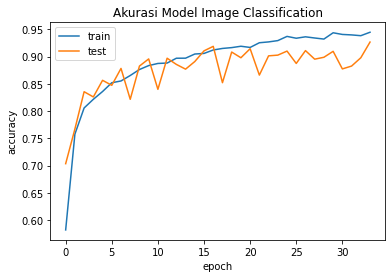

In [17]:
import matplotlib.pyplot as plt
plt.plot(riwayat_training_model.history['accuracy'])
plt.plot(riwayat_training_model.history['val_accuracy'])
plt.title('Akurasi Model Image Classification')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

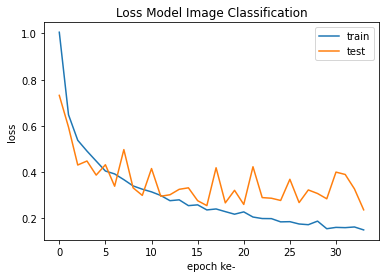

In [18]:
import matplotlib.pyplot as plt
plt.plot(riwayat_training_model.history['loss'])
plt.plot(riwayat_training_model.history['val_loss'])
plt.title('Loss Model Image Classification')
plt.ylabel('loss')
plt.xlabel('epoch ke-')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

# Simpan Model Pada Format SavedModel

In [19]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel Menjadi animal.tflite

In [20]:
import pathlib

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('animal.tflite')
tflite_model_file.write_bytes(tflite_model)

13900636